In [3]:
# Import Libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

path=r'/Users/jessicagiron/Downloads/OriginalINsurance PythonData.csv'
print(path)
df=pd.read_csv(path, index_col=False)

/Users/jessicagiron/Downloads/OriginalINsurance PythonData.csv


# Understanding the Data

In [4]:
#Understanding the shape

In [5]:
df.shape

(1338, 7)

In [6]:
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [8]:
#there are no mix datatypes in this set 
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [9]:
#check for mix values of data
for col in df.columns.tolist():
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (df[weird]) > 0:
    print (col, 'mixed')
  else:
    print(col,'consistent')

age consistent
sex consistent
bmi consistent
children consistent
smoker consistent
region consistent
charges consistent


In [10]:
#there are no extreme minimums or maximums within the categories. The maximum in the charges category is very high, but it is also possible for insurance costs to reach that amount
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [11]:
#frequency for the smoker, region, and sex columns
df['sex'].value_counts(dropna=False)

male      676
female    662
Name: sex, dtype: int64

In [12]:
df['smoker'].value_counts(dropna=False)

no     1064
yes     274
Name: smoker, dtype: int64

In [13]:
df['region'].value_counts(dropna=False)

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [14]:
#all values are uniform if they were not the following function would be put in place: dropping columns, renaming columns, and changing data variable type

In [15]:
#missing value check
df.isnull().sum()


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [16]:
#check for duplicates and drop them
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [17]:
df_clean=df.drop_duplicates()
df_clean.shape

(1337, 7)

In [18]:
df.shape

(1338, 7)

In [20]:
#analyze correlation
df_clean.corr()

/var/folders/w4/gggschwn6vl43xxxrphzmdt40000gn/T/ipykernel_64743/1863484124.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_clean.corr()


,age,bmi,children,charges
age,1.000000,0.109344,0.041536,0.298308
bmi,0.109344,1.000000,0.012755,0.198401
children,0.041536,0.012755,1.000000,0.067389
charges,0.298308,0.198401,0.067389,1.000000


/var/folders/w4/gggschwn6vl43xxxrphzmdt40000gn/T/ipykernel_64743/845421591.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.matshow(df_clean.corr())


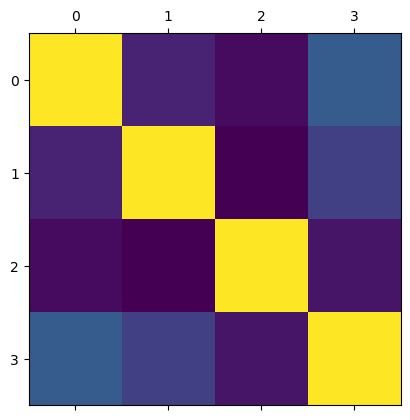

In [29]:
plt.matshow(df_clean.corr())

In [19]:
#export data 
df_clean.to_csv(os.path.join('/Users/jessicagiron/Desktop/Insurance Predictor Python Project/02 Data','df_clean'))